<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 ( Logistic Regression )

>**목차**
1. 개념정리
2. 손실함수 : 크로스 엔트로피 (Cross Entropy)
3. 실습


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---


<br>

###<center> < 가설 > </center>
###  <center>$f(x)=\sigma(xW+b)$</center>

<br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \;J(y, \hat{y})$</center>
### <center> $ =arg \; min \;J(y, f(x))$</center>
### <center> $ =arg \; min \;J(y, \sigma(xW+b))$</center>

### **시그모이드 함수 ( Sigmoid funtion )**

</br>

### <center>$H(x) = \frac{1}{1+e^{(-x)}} = \sigma(x)$</center>

**<center> e(e=2.718281..):**  자연 상수

* 구현

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

* 시각화

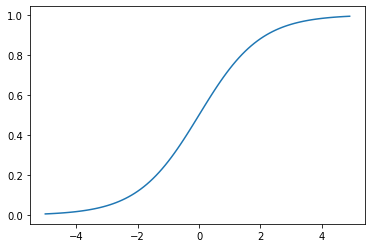

In [6]:
x_arr = np.arange(-5,5,0.1)
y_arr = []
for x in x_arr:
  y = sigmoid(x)
  y_arr.append(y)
y_arr = np.array(y_arr)

plt.plot(x_arr, y_arr)

### **가설 구현**
###<center>$f(x)=\sigma(xW+b)$</center>

In [8]:
def hypothesis(x, W, b=0):
  return sigmoid(np.dot(x,W)+b)

### **예제**

|라운드점수(X)|종합점수|결과(Y)
|------|---|---|
|-3|1|패배|
|-2|1|패배|
|-1|2|패배|
|0|3|패배|
|1|5|승리|
|2|8|승리|
|3|9|승리|


* 데이터 정의



In [9]:
X=np.array([[-3],[-2],[-1],[0],[1],[2],[3]])
Y=np.array([[0],[0],[0],[0],[1],[1],[1]])

X[0].shape,Y[0].shape

((1,), (1,))

* 예측

In [12]:
W = np.array([[1]])
W.shape

for x in X:
  y_pred = hypothesis(x, W)
  print(x, y_pred)

[-3] [0.04742587]
[-2] [0.11920292]
[-1] [0.26894142]
[0] [0.5]
[1] [0.73105858]
[2] [0.88079708]
[3] [0.95257413]


* 시각화

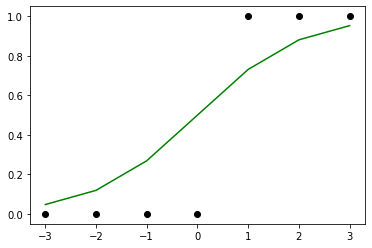

In [16]:
plt.plot(X, Y, marker='o', linestyle='', color='k')
plt.plot(X, [hypothesis(x,W) for x in X], color='g')

### **학습 파라미터**

* W 값에 따른 함수의 변화

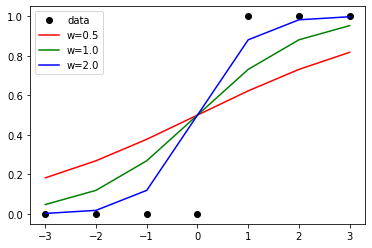

In [18]:
plt.plot(X, Y, marker='o', linestyle='', color='k')

W = np.array([[0.5]])
plt.plot(X, [hypothesis(x,W) for x in X], color='r')

W = np.array([[1]])
plt.plot(X, [hypothesis(x,W) for x in X], color='g')

W = np.array([[2]])
plt.plot(X, [hypothesis(x,W) for x in X], color='b')

plt.legend(['data', 'w=0.5', 'w=1.0', 'w=2.0'])
plt.show()

* b값에 따른 함수의 변화

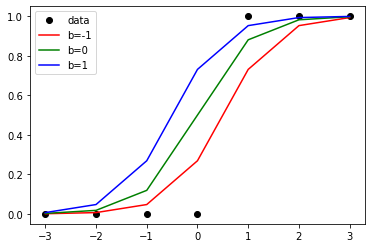

In [19]:
plt.plot(X, Y, marker='o', linestyle='', color='k')
W = np.array([[2]])

b=-1
plt.plot(X, [hypothesis(x,W,b) for x in X], color='r')

b=0
plt.plot(X, [hypothesis(x,W,b) for x in X], color='g')

b=1
plt.plot(X, [hypothesis(x,W,b) for x in X], color='b')

plt.legend(['data', 'b=-1', 'b=0', 'b=1'])
plt.show()

## 2. 손실함수: 크로스 엔트로피 (Cross Entropy)
---

</br>

## <center>$J(W) = -\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$</center>

</br>

<center> $y = 1 \rightarrow cost(y, \hat{y}) = -log(\hat{y})$</center>
<center> $y = 0 \rightarrow cost(y, \hat{y}) = -log(1-\hat{y})$</center>


* 구현

In [38]:
def J(y,y_pred):
  if y==1:
    return -(np.log10(y_pred))
  elif y==0:
    return -(np.log10(1-y_pred))
  else:
    return 0

* 시각화

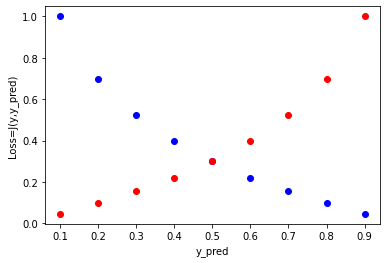

In [39]:
y_pred_arr=np.arange(0.1,1,0.1)
for y_pred in y_pred_arr:
  plt.plot(y_pred,J(1,y_pred),marker='o',color='b')
  plt.plot(y_pred,J(0,y_pred),marker='o',color='r')

plt.xlabel("y_pred")
plt.ylabel("Loss=J(y,y_pred)")
plt.show()


## 3. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|11|불합격|
|2|2|8|23|불합격|
|3|4|8|30|불합격|
|4|3|7|44|불합격|
|5|5|7.5|55|합격|
|6|6|7|61|합격|
|7|6|6|73|합격|
|8|7|7|84|합격|
|9|6|6.5|98|합격|

* 데이터 정의

In [68]:
X = np.array([[0,1,9,0],
      [1,1,8.5,11],
      [2,2,8,23],
      [3,4,8,30],
      [4,3,7,44],
      [5,5,7.5,55],
      [6,6,7,61],
      [7,6,6,73],
      [8,7,7,84],
      [9,6,6.5,98]
])
Y = np.array([0,0,0,0,0,1,1,1,1,1])

X.shape, Y.shape

((10, 4), (10,))

* 시각화 

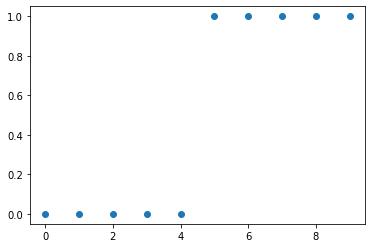

In [69]:
plt.plot(Y, marker='o', linestyle='')
plt.show()

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [70]:
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [71]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:", W, "b:", b)

W: [[ 0.9603956 ]
 [-0.15601337]
 [-1.0857877 ]
 [-0.9806791 ]] b: [0.]


* 시각화

(10,) (10, 1)


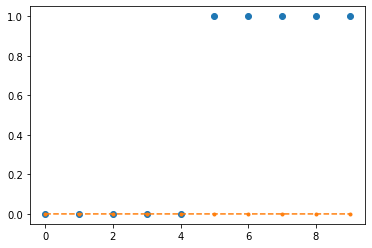

In [72]:
Y_pred = model.predict(X)
print(Y.shape, Y_pred.shape)

plt.plot(Y, marker = 'o', linestyle='')
plt.plot(Y_pred, marker='.', linestyle='--')
plt.show()

### **모델 학습**

* 모델 컴파일

In [73]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['acc']
              )

* 학습 진행

In [74]:
model.fit(X, Y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 641ms/step - loss: 37.1815 - acc: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 23.0868 - acc: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 8.9921 - acc: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3457 - acc: 0.9000
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 0.1320 - acc: 0.9000
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 0.1068 - acc: 1.0000
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 0.1058 - acc: 1.0000
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 0.1055 - acc: 1.0000
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 0.1054 - acc: 1.0000
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 0.1053 - acc: 1.0000
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 0.1

### **결과**

* 학습 파라미터 확인

In [75]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:", W, "b:", b)

W: [[ 1.0655216 ]
 [ 0.04690512]
 [-1.185585  ]
 [ 0.07849187]] b: [-0.01815456]


* 시각화

(10,) (10, 1)


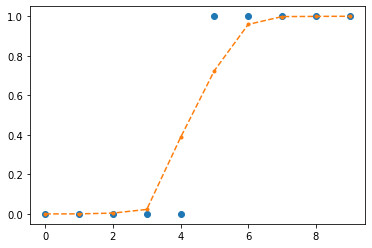

In [76]:
Y_pred=model.predict(X)
print(Y.shape,Y_pred.shape)

plt.plot(Y,marker='o',linestyle='')
plt.plot(Y_pred,marker='.',linestyle='--')
plt.show()